### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
import numpy as np

tf.set_random_seed(42)

In [2]:
tf.__version__

'1.12.0'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [4]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [5]:
print(testY[0:5])

[9 2 1 1 6]


In [6]:
print "Train set shape: ", trainX.shape

Train set shape:  (60000, 28, 28)


In [7]:
print "Test set shape: ", testX.shape

Test set shape:  (10000, 28, 28)


In [8]:
print "Unique train labels: ", np.unique(trainY)

Unique train labels:  [0 1 2 3 4 5 6 7 8 9]


In [9]:
print "Unique test labels: ", np.unique(testY)

Unique test labels:  [0 1 2 3 4 5 6 7 8 9]


**Observations:**


---

The trainset has 60000 images each with 28 * 28 pixels.

There are 10 different types of images. 

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [10]:
print "Train lable shape before hot encoding: ", trainY.shape
print 'First 5 Train labels before hot encoding: ', trainY[0:5]

Train lable shape before hot encoding:  (60000,)
First 5 Train labels before hot encoding:  [9 0 0 3 0]


In [0]:
trainY = tf.keras.utils.to_categorical(trainY)
testY = tf.keras.utils.to_categorical(testY)

In [12]:
print "Train lable shape after hot encoding: ", trainY.shape
print 'First 5 Train labels after hot encoding: ', trainY[0:5]

Train lable shape after hot encoding:  (60000, 10)
First 5 Train labels after hot encoding:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### Visualize the data

Plot first 10 images in the triaining set and their labels.

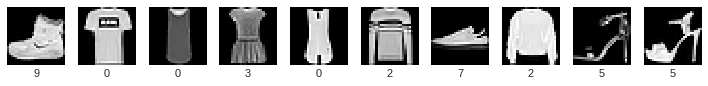

In [13]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 10))

for i, ax in enumerate(axes.flat, start=0):
    ax.imshow(trainX[i],cmap='gray')
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel(np.argmax(trainY[i]))
    
plt.tight_layout()
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [14]:
# Lets check the shape of the image
trainX[0].shape

(28, 28)

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784 (Input Layer)
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Add Dense Layer which provides 10 Outputs after applying softmax (Output Layer)
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Execute the model using model.fit()

In [17]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 42us/step - loss: 13.9744 - acc: 0.1328 - val_loss: 12.9229 - val_acc: 0.1982
Epoch 2/10
60000/60000 [==============================] - 2s 35us/step - loss: 12.9377 - acc: 0.1973 - val_loss: 12.9058 - val_acc: 0.1993
Epoch 3/10
60000/60000 [==============================] - 2s 34us/step - loss: 12.9039 - acc: 0.1994 - val_loss: 12.9058 - val_acc: 0.1993
Epoch 4/10
60000/60000 [==============================] - 2s 34us/step - loss: 12.9039 - acc: 0.1994 - val_loss: 12.9058 - val_acc: 0.1993
Epoch 5/10
60000/60000 [==============================] - 2s 35us/step - loss: 12.9039 - acc: 0.1994 - val_loss: 12.9058 - val_acc: 0.1993
Epoch 6/10
60000/60000 [==============================] - 2s 35us/step - loss: 12.9039 - acc: 0.1994 - val_loss: 12.9058 - val_acc: 0.1993
Epoch 7/10
60000/60000 [==============================] - 2s 34us/step - loss: 12.9039 - acc: 0.1994 - val_loss: 12.

**Observations:**


---

The accuracy is very less. We have to try with normalizing the data and with other hyperparameter tuning to increase the accuracy.

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784 (Input Layer)
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax (Output Layer)
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


### Execute the model

In [20]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.6061 - acc: 0.7925 - val_loss: 0.5148 - val_acc: 0.8249
Epoch 2/10
60000/60000 [==============================] - 3s 58us/step - loss: 0.4916 - acc: 0.8286 - val_loss: 0.4799 - val_acc: 0.8333
Epoch 3/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.4693 - acc: 0.8405 - val_loss: 0.4822 - val_acc: 0.8354
Epoch 4/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.4594 - acc: 0.8420 - val_loss: 0.4669 - val_acc: 0.8378
Epoch 5/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.4500 - acc: 0.8440 - val_loss: 0.4655 - val_acc: 0.8382
Epoch 6/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.4445 - acc: 0.8460 - val_loss: 0.4716 - val_acc: 0.8379
Epoch 7/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.4386 - acc: 0.8480 - val_loss: 0.4602 - val_acc

**Observations:**


---

Accuracy have improved highly by doing batch normalization. Lets impover the accuracy by tuning the hyper parameters.

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784 (Input Layer)
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add Dense Layer which provides 10 Outputs after applying softmax (Output Layer)
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Optimizer
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)

#Comile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_2 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 784)               3136      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


In [23]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/step - loss: 0.9568 - acc: 0.6800 - val_loss: 0.7009 - val_acc: 0.7599
Epoch 2/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.6475 - acc: 0.7830 - val_loss: 0.6105 - val_acc: 0.7893
Epoch 3/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.5899 - acc: 0.7976 - val_loss: 0.5732 - val_acc: 0.8030
Epoch 4/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.5595 - acc: 0.8078 - val_loss: 0.5574 - val_acc: 0.8107
Epoch 5/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.5402 - acc: 0.8160 - val_loss: 0.5428 - val_acc: 0.8142
Epoch 6/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.5262 - acc: 0.8200 - val_loss: 0.5396 - val_acc: 0.8165
Epoch 7/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.5177 - acc: 0.8226 - val_loss: 0.5180 - val_acc

**Observations:**


---

By having learning rate as 0.001, the model have not improved, rather the accuracy have somwhat reduced. Lets introduce the some Dense layer.

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

#Reshape data from 2D to 1D -> 28x28 to 784 (Input Layer)
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

#Add 1st Dense/hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

#Add 2nd Dense/hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))

#Add 3rd Dense/hidden layer
model.add(tf.keras.layers.Dense(10, activation='relu'))

#Add Dense Layer which provides 10 Outputs after applying softmax (Output Layer)
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#optimizer with learning parameter
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

#Comile the model
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [25]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                110       
Total params: 92,856
Trainable params: 91,288
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [26]:
model.fit(trainX, trainY, 
          validation_data=(testX, testY), 
          epochs=10,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.5459 - acc: 0.8082 - val_loss: 0.4328 - val_acc: 0.8424
Epoch 2/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.3949 - acc: 0.8567 - val_loss: 0.3945 - val_acc: 0.8547
Epoch 3/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.3558 - acc: 0.8700 - val_loss: 0.3727 - val_acc: 0.8671
Epoch 4/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.3298 - acc: 0.8774 - val_loss: 0.3651 - val_acc: 0.8704
Epoch 5/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.3137 - acc: 0.8836 - val_loss: 0.3500 - val_acc: 0.8733
Epoch 6/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.2974 - acc: 0.8902 - val_loss: 0.3457 - val_acc: 0.8753
Epoch 7/10
60000/60000 [==============================] - 6s 93us/step - loss: 0.2821 - acc: 0.8948 - val_loss: 0.3632 - val_a

**Observations:**


---

By introducing the dense layer and having learning rate as 0.03, the accuracy have improved from .84 to .88. Still the accuracy can be increased by reducing the batch size and increasing the epoch.